In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
#reading the data
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
# EXPLORING THE DATA

In [3]:
# This dataset was obtained from the UCI Machine learning repository
#view the features
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
#view the first few columns
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#view dimensions of the data
print("dimension of diabetes data: {}".format(diabetes.shape))
# 768 rows and 9 columns

dimension of diabetes data: (768, 9)


In [7]:
#In this case, the label is the outcome
print(diabetes.groupby('Outcome').size())
#for the selected dataset, there are 500 negative cases ad 268 positive cases of diabetes 

Outcome
0    500
1    268
dtype: int64


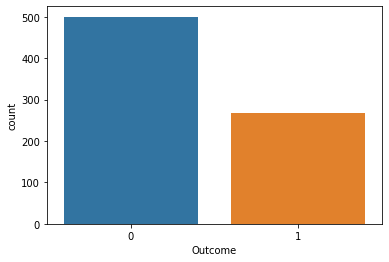

In [8]:
#The following plot shows how many cases are positive/negative for diabetes 
sns.countplot(diabetes['Outcome'], label="Count")
plt.show()

In [9]:
# convinient way of obtaining the data types
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
# TRAINING THE MODEL
results_list = []

In [11]:
# split the data in to test and train sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], 
                                                    diabetes['Outcome'], stratify=diabetes['Outcome'],
                                                    random_state=66)

In [42]:
# Logistic regression
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print("Training set accuracy: {:.3f}".format(train_score))
print("Test set accuracy: {:.3f}".format(test_score))
results_list.append([train_score,test_score])

Training set accuracy: 0.781
Test set accuracy: 0.771


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
# K nearest neighbours
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("Training set accuracy: {:.3f}".format(train_score))
print("Test set accuracy: {:.3f}".format(test_score))
results_list.append([train_score,test_score])

Training set accuracy: 0.790
Test set accuracy: 0.740


In [45]:
# decision trees
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)
print("Training set accuracy: {:.3f}".format(train_score))
print("Test set accuracy: {:.3f}".format(test_score))
results_list.append([train_score,test_score])

Training set accuracy: 1.000
Test set accuracy: 0.714


In [31]:
# The accuracy on the training set is 100%, while the test set accuracy is much worse.
# This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.
#
# We set max_depth=3, limiting the depth of the tree decreases overfitting.
# This leads to a lower accuracy on the training set, but an improvement on the test set.

In [46]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)
print("Training set accuracy: {:.3f}".format(train_score))
print("Test set accuracy: {:.3f}".format(test_score))
results_list.append([train_score,test_score])

Training set accuracy: 0.773
Test set accuracy: 0.740


In [47]:
# SVM
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Training set accuracy: {:.3f}".format(train_score))
print("Test set accuracy: {:.3f}".format(test_score))
results_list.append([train_score,test_score])

Training set accuracy: 0.774
Test set accuracy: 0.755


In [48]:
#Naive Bayes
G_nb = GaussianNB()
G_nb.fit(X_train, y_train)
y_pred = G_nb.predict(X_test)
train_score = G_nb.score(X_train, y_train)
test_score = G_nb.score(X_test, y_test)
print("Training set accuracy: {:.3f}".format(train_score))
print("Test set accuracy: {:.3f}".format(test_score))
results_list.append([train_score,test_score])

Training set accuracy: 0.764
Test set accuracy: 0.750


In [59]:
models = ['Logistic Regression', 'K nearest neighbours', 'decision trees-0depth', 'decision trees-3depth', 'Support Vector Machines',"Naive Bayes"]
print(models)
print(results_list)

['Logistic Regression', 'K nearest neighbours', 'decision trees-0depth', 'decision trees-3depth', 'Support Vector Machines', 'Naive Bayes']
[[0.78125, 0.7708333333333334], [0.7899305555555556, 0.7395833333333334], [1.0, 0.7135416666666666], [0.7725694444444444, 0.7395833333333334], [0.7743055555555556, 0.7552083333333334], [0.7638888888888888, 0.75]]


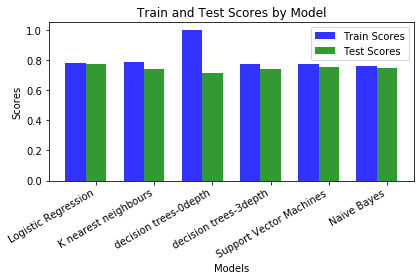

In [60]:
# data to plot
n_groups = 6

train_scores = [x[0] for x in results_list]
test_scores = [x[1] for x in results_list]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, train_scores, bar_width,
alpha=opacity,
color='b',
label='Train Scores')

rects2 = plt.bar(index + bar_width, test_scores, bar_width,
alpha=opacity,
color='g',
label='Test Scores')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores by Model')
plt.xticks(index + bar_width, tuple(models))

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# From the above bar graph, we can see that Logistic Regression generalizes best for the given data set

# Further work
# Testing these models using cross validation to verify the results before identifying which model works best